In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
from scipy.stats import skew
import seaborn as sns
import os
#from fpdf import FPDF


In [2]:
#file_path1={'file_name': '/Users/psehgal/Data.csv'}
#file_location = file_path1['file_name'] 
file_name = '/Users/psehgal/atp_test/Data_clay.csv'
topclay1png = '/Users/psehgal/dev/airflow_home/Tennis_Data_Pipeline_airflow_Project/images_for_reports/topclay1png.png'
topclay2png = '/Users/psehgal/dev/airflow_home/Tennis_Data_Pipeline_airflow_Project/images_for_reports/topclay2png.png'
topclaycsv = '/Users/psehgal/dev/airflow_home/Tennis_Data_Pipeline_airflow_Project/images_for_reports/topclaycsv.csv'


In [3]:
# Parameters
file_name = "/Users/psehgal/atp_test/Data_clay.csv"
topclay1png = "/Users/psehgal/dev/airflow_home/Tennis_Data_Pipeline_airflow_Project/images_for_reports/topclay1png.png"
topclay2png = "/Users/psehgal/dev/airflow_home/Tennis_Data_Pipeline_airflow_Project/images_for_reports/topclay2png.png"
topclay3csv = "/Users/psehgal/dev/airflow_home/Tennis_Data_Pipeline_Airflow_Project/images_for_reports/topclaycsv.csv"


In [4]:
#data = pd.read_csv('/Users/psehgal/dev/airflow_home/kaggleatpdata.csv', dtype='unicode')
data = pd.read_csv(file_name, encoding = 'ISO-8859-1')

In [5]:
data

,Unnamed: 0,Unnamed: 0.1,ATP,Location,Tournament,Date,Series,Court,Surface,Round,...,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment
0,484,484,13,Mexico City,Mexican Open,21/02/2000,International Gold,Outdoor,Clay,1st Round,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed
1,485,485,13,Mexico City,Mexican Open,21/02/2000,International Gold,Outdoor,Clay,1st Round,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Retired
2,486,486,13,Mexico City,Mexican Open,21/02/2000,International Gold,Outdoor,Clay,1st Round,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed
3,487,487,13,Mexico City,Mexican Open,21/02/2000,International Gold,Outdoor,Clay,1st Round,...,2.0,6.0,4.0,NaN,NaN,NaN,NaN,2.0,1.0,Completed
4,488,488,13,Mexico City,Mexican Open,21/02/2000,International Gold,Outdoor,Clay,1st Round,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15423,46208,46208,45,Umag,Konzum Croatia Open,22/07/2016,ATP250,Outdoor,Clay,Quarterfinals,...,6.0,6.0,2.0,NaN,NaN,NaN,NaN,2.0,1.0,Completed
15424,46209,46209,45,Umag,Konzum Croatia Open,22/07/2016,ATP250,Outdoor,Clay,Quarterfinals,...,1.0,6.0,1.0,NaN,NaN,NaN,NaN,2.0,1.0,Completed
15425,46210,46210,45,Umag,Konzum Croatia Open,23/07/2016,ATP250,Outdoor,Clay,Semifinals,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed
15426,46211,46211,45,Umag,Konzum Croatia Open,23/07/2016,ATP250,Outdoor,Clay,Semifinals,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed


In [6]:
data.Series.unique()

array(['International Gold', 'International', 'Masters', 'Grand Slam',
       'International Series', 'ATP250', 'ATP500', 'Masters 1000'],
      dtype=object)

In [7]:
# Best 10 players on clay, grass, and hard surfaces

In [8]:
# df with column names
surface = data[['Surface', 'Winner', 'Loser']]

In [9]:
surface.shape

(15428, 3)

In [10]:
# create 2 df for winner and looser and change the column names to player
surface_w = surface[['Surface', 'Winner']]
surface_l = surface[['Surface', 'Loser']]
surface_w.columns = ['Surface', 'Player']
surface_l.columns = ['Surface', 'Player']

In [11]:
# add 1 more column to the df and fill with sequential nums from 1 to length of df
surface_w['idx'] = range(1, len(surface_w) + 1)
surface_l['idx'] = range(1, len(surface_l) + 1)

In [12]:
# count the num of winning matches for every surface and player combination 
surface_w = surface_w.groupby(['Surface', 'Player']).count()
surface_w = surface_w.reset_index()
surface_w.columns = ['Surface', 'Player', 'Count_Win']


In [13]:
# count the num of lost matches for every surface and player combination
surface_l = surface_l.groupby(['Surface', 'Player']).count()
surface_l = surface_l.reset_index()
surface_l.columns = ['Surface', 'Player', 'Count_Lose']

In [14]:
surface = pd.merge(surface_w, surface_l, on=['Surface', 'Player'])

In [15]:
surface['total_play'] = surface['Count_Win'] + surface['Count_Lose']

In [16]:
surface['perc_win'] = round(surface['Count_Win'] / surface['total_play'],4)*100

In [17]:
surface = surface[surface.total_play > 50]

In [18]:
surface.sort_values(by='perc_win', ascending=False).head(30)

,Surface,Player,Count_Win,Count_Lose,total_play,perc_win
396,Clay,Nadal R.,351,35,386,90.93
135,Clay,Djokovic N.,169,39,208,81.25
165,Clay,Federer R.,203,60,263,77.19
304,Clay,Kuerten G.,105,40,145,72.41
169,Clay,Ferrero J.C.,221,86,307,71.99
405,Clay,Nishikori K.,60,24,84,71.43
550,Clay,Thiem D.,59,24,83,71.08
100,Clay,Coria G.,129,53,182,70.88
168,Clay,Ferrer D.,293,122,415,70.60
389,Clay,Moya C.,203,85,288,70.49


In [19]:
# Best players on Clay

top_Clay = surface[surface.Surface == 'Clay'].sort_values(by='perc_win', ascending = False).head(10)
#top_Clay.to_csv('top_clay.csv')

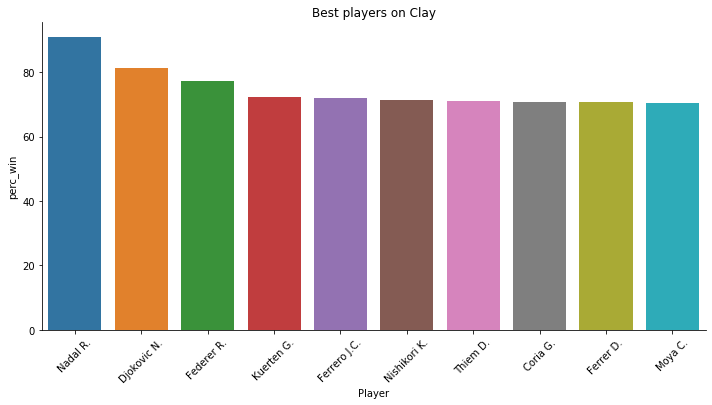

In [20]:
# plot the graph
g=sns.catplot(x='Player', y='perc_win', data=top_Clay, kind='bar', height=5, aspect=2)
g.set_xticklabels(labels = top_Clay.Player,  rotation=45)
plt.title('Best players on Clay')
plt.savefig(topclay1png, bbox_inches='tight')

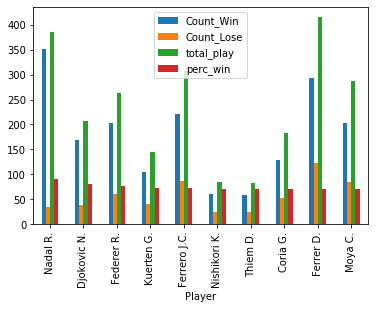

In [21]:
top_Clay.plot(x='Player', kind='bar')
plt.savefig(topclay2png, bbox_inches='tight')


In [22]:
#from pandas.plotting import table
#ax = plt.subplot(111, frame_on=True) # no visible frame
#ax.xaxis.set_visible(False)  # hide the x axis
#ax.yaxis.set_visible(False)  # hide the y axis
#
#table(ax, top_Clay)  # where df is your data frame
#
#plt.savefig('claytable.png', bbox_inches='tight')

In [23]:
top_Clay.to_csv(topclaycsv)